# ❤️ Heart Disease Risk Analysis — Exploratory Data Analysis (EDA)

Exploring patterns in cardiovascular health data using the **Framingham Heart Study dataset** to understand which factors most influence the 10-year risk of heart disease.

### 🎯 Objectives
- Explore dataset structure and variable distributions  
- Handle missing values properly (median imputation)  
- Analyze relationships between risk factors and heart disease  
- Visualize health-related patterns and correlations  
- Summarize actionable insights

**Dataset:** Framingham Heart Study — [Kaggle Link](https://www.kaggle.com/datasets/amanajmera1/framingham-heart-study-dataset)


In [2]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set global options
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Visualization style
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (10, 5),
    "axes.labelsize": 12,
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})

# Helper functions
def annotate_bars(ax, fmt="{:.0f}", dy=0.01):
    ymax = ax.get_ylim()[1]
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, h + dy*ymax, fmt.format(h),
                ha="center", va="bottom", fontsize=10, color="black")

def subtitle(fig, text, y=0.93, size=11):
    fig.text(0.5, y, text, ha='center', fontsize=size)


## 📂 Load Dataset


In [3]:
df = pd.read_csv("framingham.csv") 
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.00,0,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,2.00,0,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1.00,1,20.00,0.00,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,3.00,1,30.00,0.00,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,3.00,1,23.00,0.00,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00,0


## 🔍 Initial Data Inspection


In [4]:
print("Shape:", df.shape)
display(df.info())
display(df.describe())


Shape: (4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.

None

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,"4,240.00","4,240.00","4,135.00","4,240.00","4,211.00","4,187.00","4,240.00","4,240.00","4,240.00","4,190.00","4,240.00","4,240.00","4,221.00","4,239.00","3,852.00","4,240.00"
mean,0.43,49.58,1.98,0.49,9.01,0.03,0.01,0.31,0.03,236.70,132.35,82.90,25.80,75.88,81.96,0.15
std,0.50,8.57,1.02,0.50,11.92,0.17,0.08,0.46,0.16,44.59,22.03,11.91,4.08,12.03,23.95,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,0.00,49.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,1.00,56.00,3.00,1.00,20.00,0.00,0.00,1.00,0.00,263.00,144.00,90.00,28.04,83.00,87.00,0.00
max,1.00,70.00,4.00,1.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


## 🧼 Handling Missing Values — Median Imputation

Some medical features (e.g., blood pressure, cholesterol) contain missing values.  
Instead of dropping records, we replace them using the **median**, which preserves central tendency and minimizes bias from outliers.


In [5]:
# Check missing values
print("Missing values before imputation:")
print(df.isnull().sum())

# Median imputation for numeric columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Verify
print("\nMissing values after imputation:")
print(df.isnull().sum().sum(), "missing values remaining")


Missing values before imputation:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Missing values after imputation:
0 missing values remaining


## 🎯 Target Variable — 10-Year Heart Disease Risk


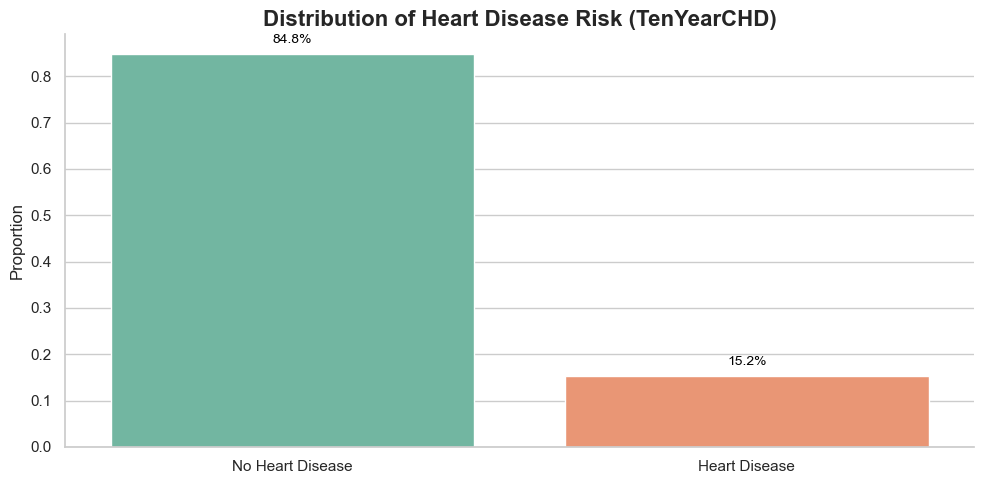

0   0.85
1   0.15
Name: TenYearCHD, dtype: float64

In [6]:
target_counts = df["TenYearCHD"].value_counts(normalize=True)
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Set2")
plt.title("Distribution of Heart Disease Risk (TenYearCHD)")
plt.ylabel("Proportion")
plt.xticks([0, 1], ["No Heart Disease", "Heart Disease"])
annotate_bars(plt.gca(), fmt="{:.1%}", dy=0.02)
sns.despine()
plt.tight_layout()
plt.show()

target_counts



## 📊 Univariate Analysis
Explore key numeric features related to cardiovascular health.


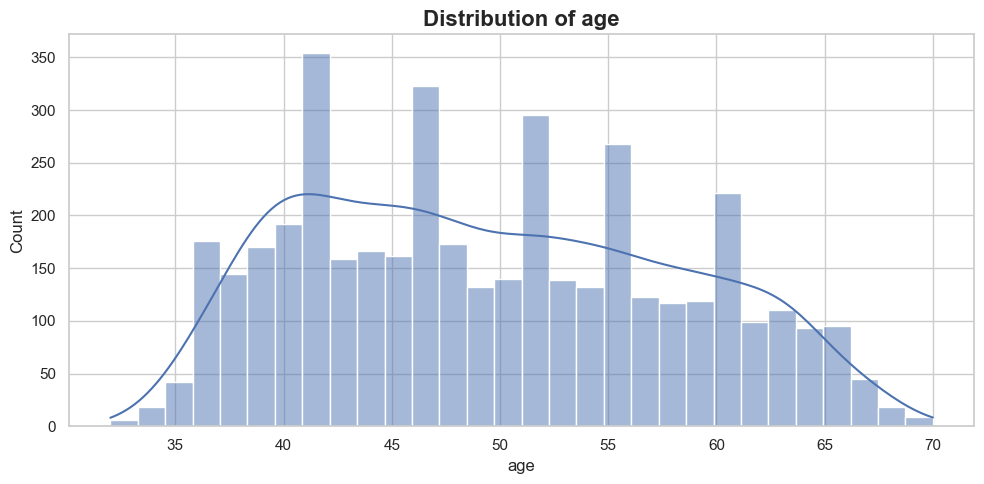

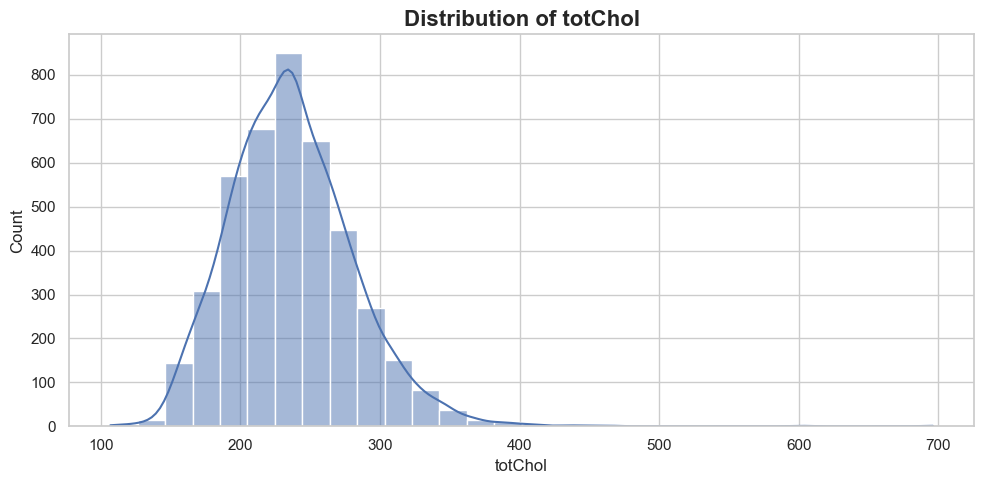

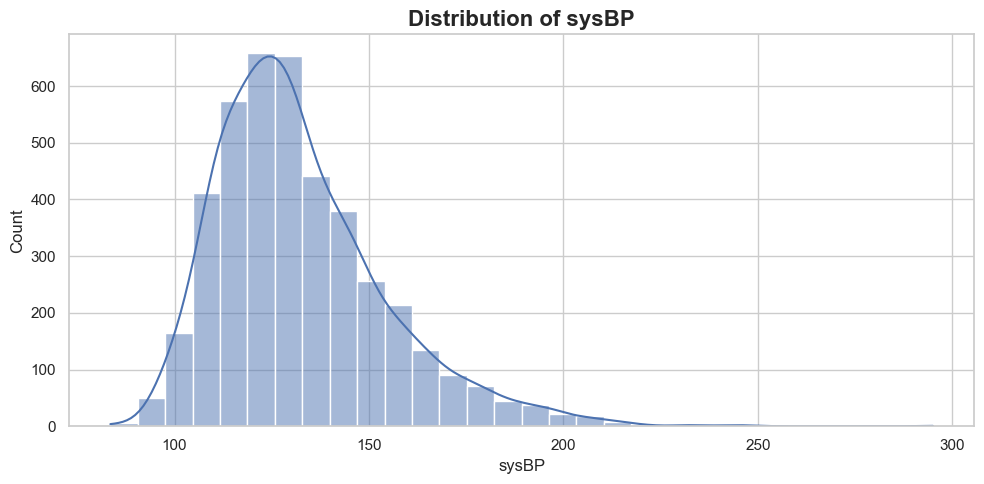

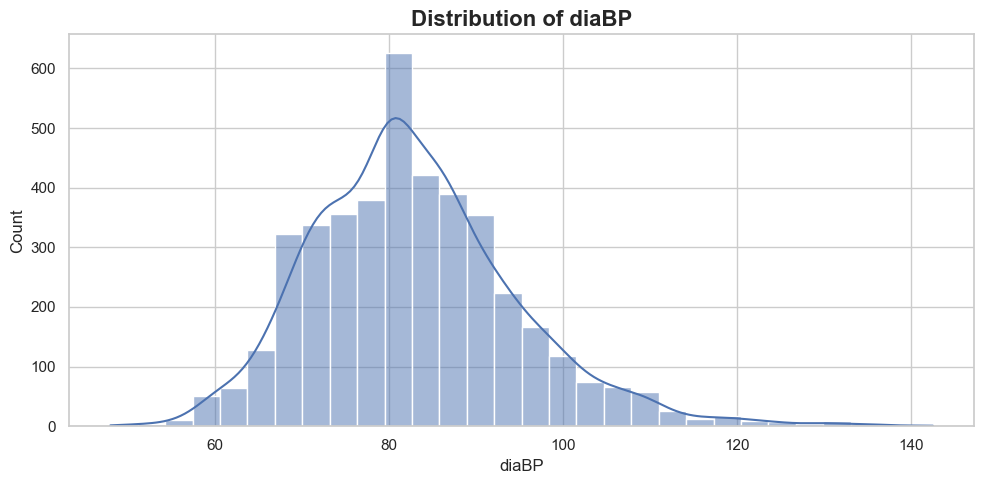

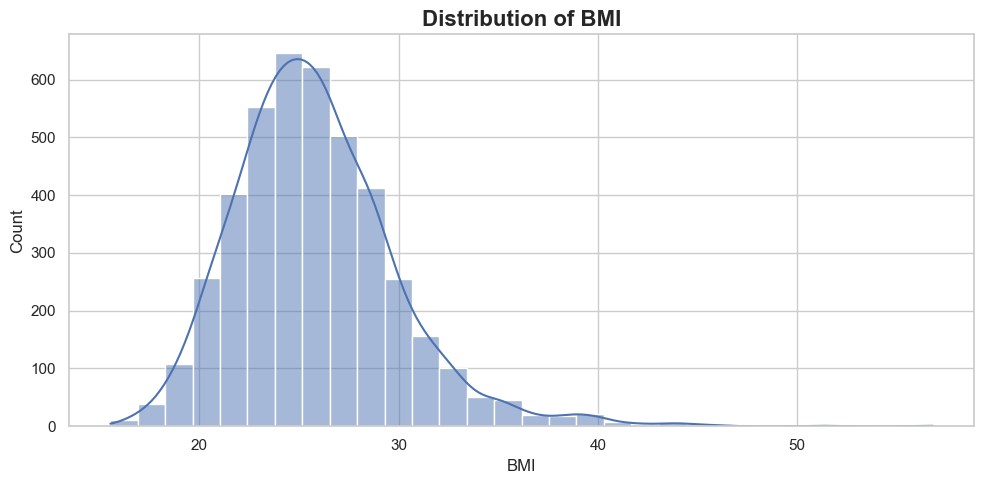

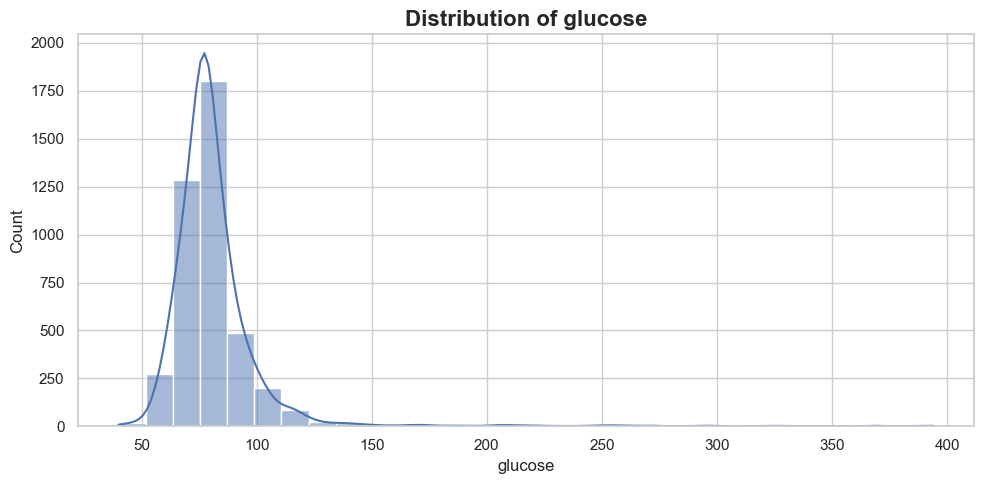

In [7]:
num_features = ["age", "totChol", "sysBP", "diaBP", "BMI", "glucose"]
for feature in num_features:
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.tight_layout()
    plt.show()


## 🔗 Bivariate Analysis — Key Risk Factors
We compare key features across heart disease outcomes.


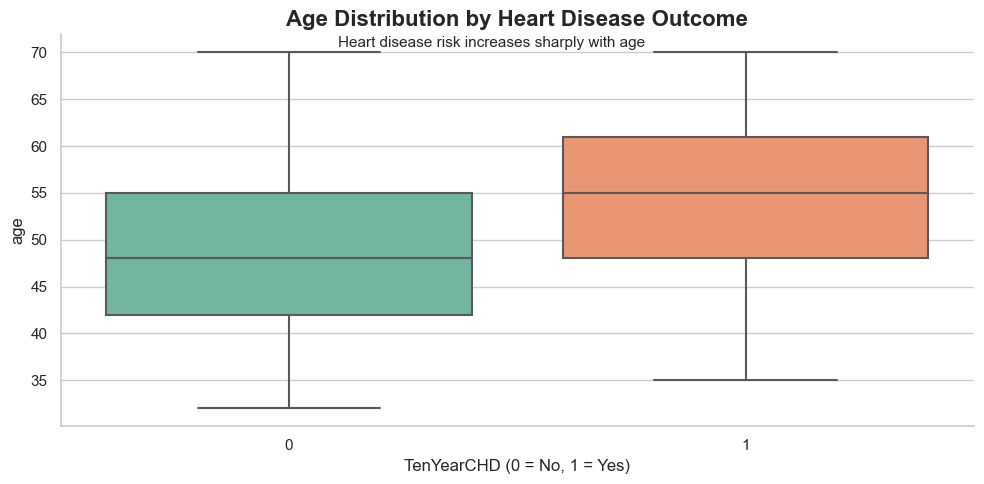

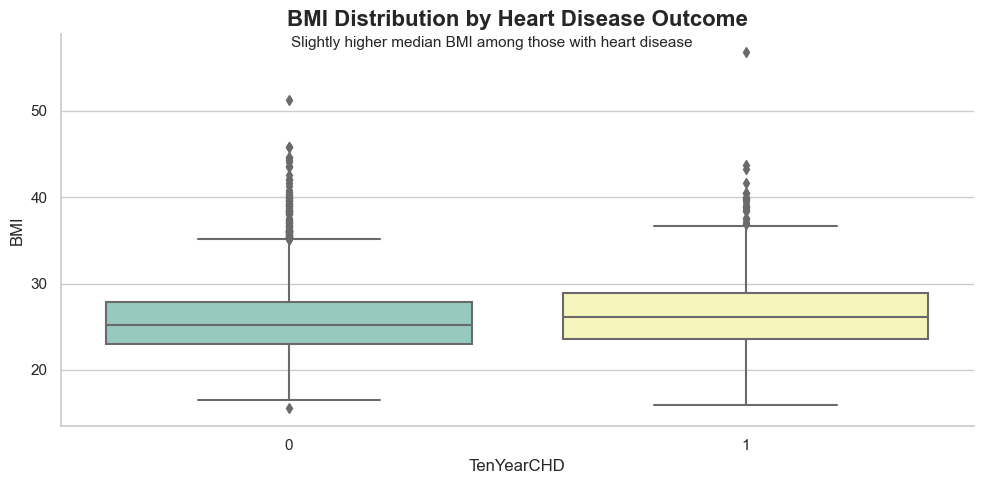

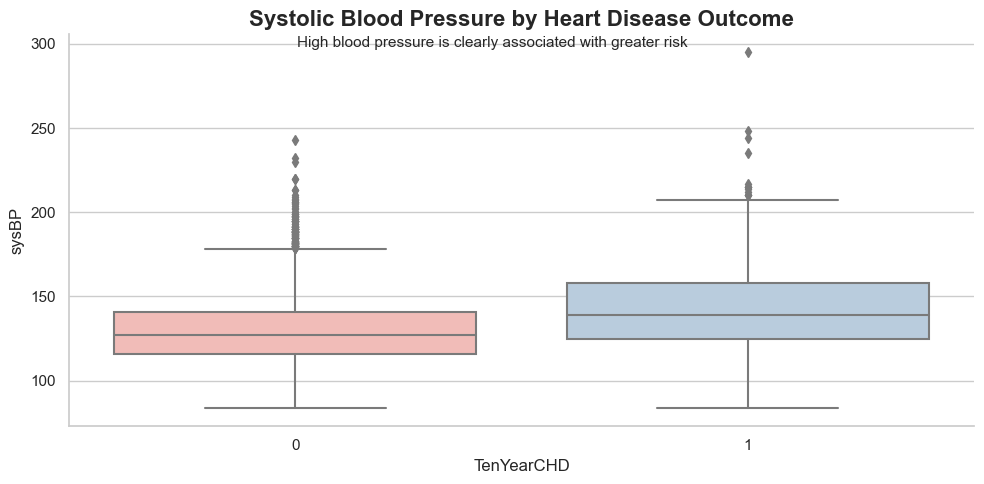

In [9]:
# Age vs Heart Disease
sns.boxplot(data=df, x="TenYearCHD", y="age", palette="Set2")
plt.title("Age Distribution by Heart Disease Outcome")
subtitle(plt.gcf(), "Heart disease risk increases sharply with age",y=0.89)
plt.xlabel("TenYearCHD (0 = No, 1 = Yes)")
sns.despine()
plt.tight_layout()
plt.show()

# BMI vs Heart Disease
sns.boxplot(data=df, x="TenYearCHD", y="BMI", palette="Set3")
plt.title("BMI Distribution by Heart Disease Outcome")
subtitle(plt.gcf(), "Slightly higher median BMI among those with heart disease",y=0.89)
sns.despine()
plt.tight_layout()
plt.show()

# Systolic BP
sns.boxplot(data=df, x="TenYearCHD", y="sysBP", palette="Pastel1")
plt.title("Systolic Blood Pressure by Heart Disease Outcome")
subtitle(plt.gcf(), "High blood pressure is clearly associated with greater risk",y=0.89)
sns.despine()
plt.tight_layout()
plt.show()


## ❤️ Lifestyle-Related Risk Factors
Let's explore categorical variables such as smoking, diabetes, and gender.


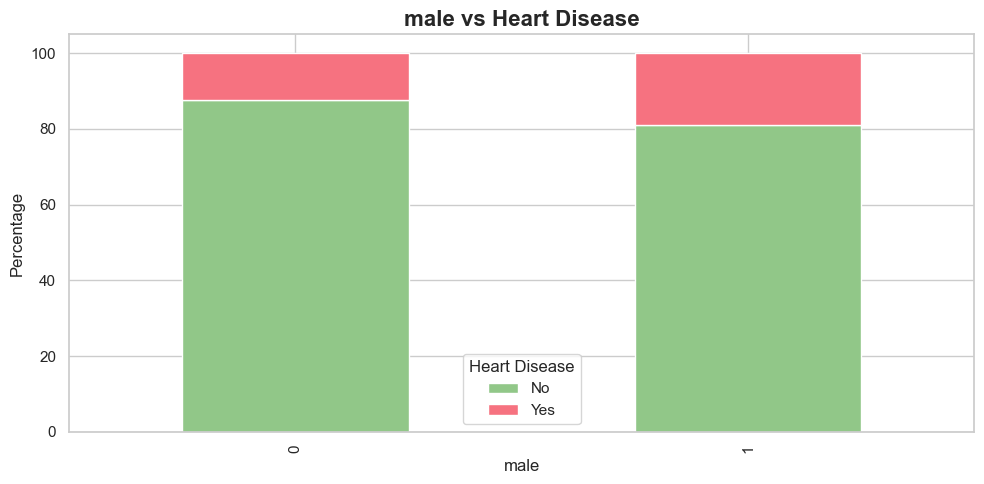

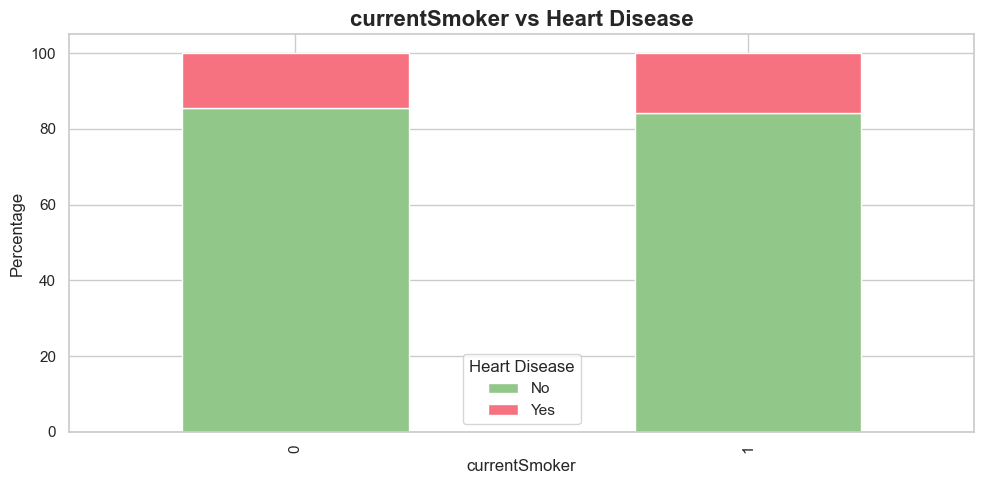

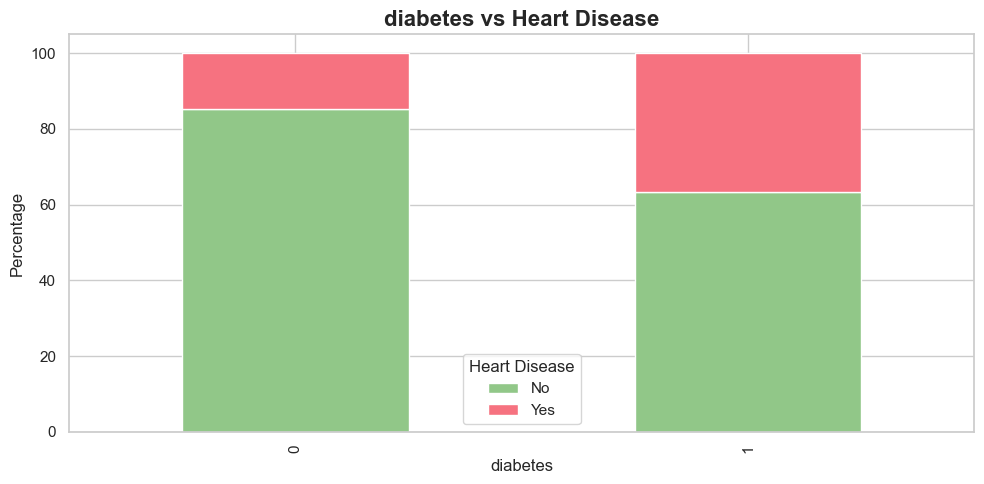

In [10]:
categorical = ["male", "currentSmoker", "diabetes"]

for c in categorical:
    cross_tab = pd.crosstab(df[c], df["TenYearCHD"], normalize="index") * 100
    cross_tab.plot(kind="bar", stacked=True, color=["#91c788", "#f67280"])
    plt.title(f"{c} vs Heart Disease")
    plt.ylabel("Percentage")
    plt.legend(["No", "Yes"], title="Heart Disease")
    plt.tight_layout()
    plt.show()


## 🔥 Correlation Heatmap
Visualizing relationships between numeric features and the target variable.


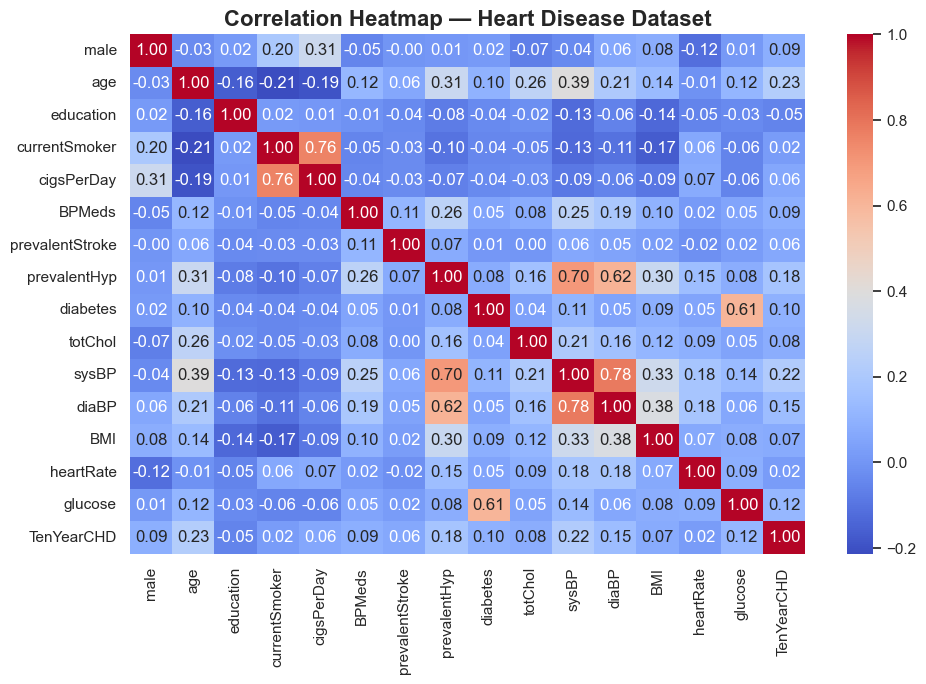

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap — Heart Disease Dataset")
plt.tight_layout()
plt.show()


## ✅ Insights Summary

- **Age** and **systolic blood pressure** are the strongest risk factors.
- **Smoking** and **diabetes** significantly raise the probability of heart disease.
- **BMI** and **cholesterol** contribute moderately.
- Male participants tend to have slightly higher risk in this dataset.
- Median imputation preserved dataset integrity and ensured complete analysis.

### 💬 Final Note
Exploratory analysis reveals that heart disease is influenced by a mix of biological and lifestyle factors.  
Further steps could include building predictive models to quantify risk — but this notebook focuses purely on **EDA and insight discovery**.
